<a href="https://colab.research.google.com/github/jh941213/crawling/blob/main/7_API%E1%84%85%E1%85%B3%E1%86%AF_%E1%84%8B%E1%85%B5%E1%84%8B%E1%85%AD%E1%86%BC%E1%84%92%E1%85%A1%E1%86%AB_%E1%84%8F%E1%85%B3%E1%84%85%E1%85%A9%E1%86%AF%E1%84%85%E1%85%B5%E1%86%BC(%E1%84%82%E1%85%A6%E1%84%8B%E1%85%B5%E1%84%87%E1%85%A5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 그래프에서 한글표현을 위해 폰트를 설치합니다.
!apt-get update -qq
!apt-get install fonts-nanum* -qq


Selecting previously unselected package fonts-nanum.
(Reading database ... 123991 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()

NanumGothic Eco


In [ ]:
# 라이브러리 추가
import urllib.request
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

import json
import glob
import sys
import os
from datetime import datetime
from random import shuffle


## 0. API란? 

- API(application programming interface)     
  운영체제나 시스템, 애플리케이션, 라이브러리 등을 활용해 응용 프로그램을 작성할 수 있게 하는 다양한 인터페이스를 의미합니다. Window API, Java API, HTML5 API, Android API 등이 있습니다. (네이버 open api 가이드)

- 웹 API   
  웹 API는 웹 애플리케이션 개발에서 다른 서비스에 요청을 보내고 응답을 받기 위해 정의된 명세를 말합니다. 예를 들어 블로그 API를 이용하면 블로그에 접속하지 않고도 다른 방법으로 글을 올릴 수 있습니다. 그 외에 우체국의 우편번호 API, 구글과 네이버의 지도 API등 유용한 API들이 많아서, 요즘은 홈페이지 구축이나 추가개편 시 따로 추가로 개발하지 않고 이런 오픈 API를 가져와 사용하는 추세입니다. (위키백과)

- 오픈 API    
  API 중에서 플랫폼의 기능 또는 콘텐츠를 외부에서 웹 프로토콜(HTTP)로 호출해 사용할 수 있게 개방(open)한 API를 의미합니다. 네이버 개발자센터에서 제공하고 있는 지도, 검색을 비롯 기계 번역, 캡차, 단축 URL 등 대부분 API는 HTTP로 호출할 수 있는 오픈 API에 해당합니다. (네이버 open api 가이드)

- 그외 API 관련 용어
https://developers.naver.com/docs/common/openapiguide/apiterms.md#api%EC%9D%98-%EA%B8%B0%EB%B3%B8

## 1. 네이버 API

네이버 오픈API는 네이버 플랫폼의 기능을 외부 개발자가 쉽게 이용할 수 있게 웹 또는 SDK 형태로 공개한 기술들입니다. 네이버 오픈API로 활용할 수 있는 기술에는 네이버 아이디로 로그인과 지도, 검색이 있으며, Clova의 음성 인식 기술과 음성 합성 기술, 얼굴 인식 기술, Papago의 기계 번역 기술 등이 있습니다.

이 중에서 네이버 데이터랩 API와 Papago 기계번역 API를 활용해보겠습니다. 

### 1-1. 네이버 데이터 랩 API

가장 먼저  Open API를 사용하기 위한 키를 발급받아야 합니다.   
https://developers.naver.com/apps/#/register?defaultScope=datalab    
위 링크에서 API 키를 발급받아 주세요

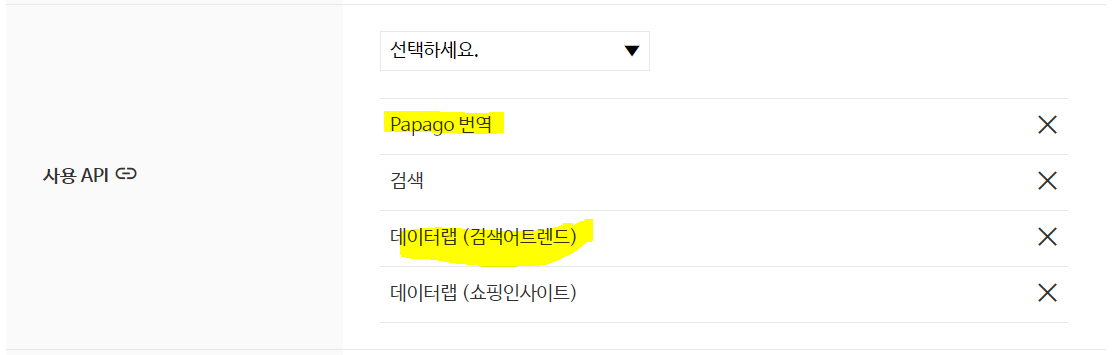

In [ ]:
naver_id = input('네이버 ID를 입력해주세요 : ') # 애플리케이션 등록시 발급 받은 값 입력
naver_key = input('네이버 API 키를 입력해주세요 : ') # 애플리케이션 등록시 발급 받은 값 입력

네이버 ID를 입력해주세요 : H3qVhLCQXgavfo_guLO9
네이버 API 키를 입력해주세요 : Qo4mt_JbRN


#### 네이버 데이터 랩 소개

- 네이버 데이터 랩은 궁금한 주제어를 설정하고, 하위 주제어에 해당하는 검색어를 콤마(,)로 구분입력하면,. 입력한 단어의 추이를 하나로 합산하여 해당 주제가 네이버에서 얼마나 검색되는지 조회할 수 있는 서비스입니다. 
https://datalab.naver.com/keyword/trendSearch.naver   

- 웹에서는 주제어 5개까지만 가능하지만 API를 활용하면 더 많은 주제들을 비교할 수 있습니다. 
- 네이버 데이터랩 API 개발가이드 : https://developers.naver.com/docs/datalab/search/

In [ ]:
# 개발가이드에 나온 샘플 
# 정해진 요청 형식에 맞게 요청을 해야 합니다 ! 
# 원하는 데이터를 body에 반영하여 요청하면 됩니다. 

import os
import sys
import urllib.request
client_id = naver_id
client_secret = naver_key
url = "https://openapi.naver.com/v1/datalab/search"
body = "{\"startDate\":\"2019-01-01\",\"endDate\":\"2020-03-15\",\"timeUnit\":\"month\",\"keywordGroups\":[{\"groupName\":\"한글\",\"keywords\":[\"한글\",\"korean\"]},{\"groupName\":\"영어\",\"keywords\":[\"영어\",\"english\"]}],\"device\":\"pc\",\"ages\":[\"1\",\"2\"],\"gender\":\"f\"}";

request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
request.add_header("Content-Type","application/json")
response = urllib.request.urlopen(request, data=body.encode("utf-8"))
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

{"startDate":"2019-01-01","endDate":"2020-03-31","timeUnit":"month","results":[{"title":"한글","keywords":["한글","korean"],"data":[{"period":"2019-01-01","ratio":26.79225},{"period":"2019-02-01","ratio":23.73103},{"period":"2019-03-01","ratio":57.4045},{"period":"2019-04-01","ratio":54.97121},{"period":"2019-05-01","ratio":83.51648},{"period":"2019-06-01","ratio":75.85034},{"period":"2019-07-01","ratio":48.43014},{"period":"2019-08-01","ratio":64.86132},{"period":"2019-09-01","ratio":73.75719},{"period":"2019-10-01","ratio":100},{"period":"2019-11-01","ratio":76.71376},{"period":"2019-12-01","ratio":48.71794},{"period":"2020-01-01","ratio":21.82103},{"period":"2020-02-01","ratio":22.65829},{"period":"2020-03-01","ratio":88.22605}]},{"title":"영어","keywords":["영어","english"],"data":[{"period":"2019-01-01","ratio":16.95447},{"period":"2019-02-01","ratio":12.61119},{"period":"2019-03-01","ratio":20.61747},{"period":"2019-04-01","ratio":20.6698},{"period":"2019-05-01","ratio":25.85034},{"perio

#### 코스피 상장 회사 목록
- 2019년 1월 1일부터 현재까지 코스피 상장 회사들의 검색량을 비교해봅시다.

https://kind.krx.co.kr/corpgeneral/corpList.do?method=loadInitPage

코드 참고: https://brunch.co.kr/@sukhyun9673/15#comment

In [ ]:
from urllib import request

#API 설정 : API키와 header 지정 
client_id = naver_id  
client_secret = naver_key

link = "https://openapi.naver.com/v1/datalab/search"
requested = request.Request(link)
requested.add_header("X-Naver-Client-Id",client_id)
requested.add_header("X-Naver-Client-Secret",client_secret)
requested.add_header("Content-Type","application/json")

In [ ]:
datetime.now()

datetime.datetime(2022, 3, 31, 8, 34, 15, 407178)

In [ ]:
now = datetime.now().strftime("%Y-%m-%d") # 현재날짜 설정

# 개발가이드에 나와있는 요청 body와 같은 서식으로 딕셔너리 작성 
body_dict = {"startDate":"2019-01-01", 
               "endDate": now,
               "timeUnit":"month"}

In [ ]:
# 다운받은 상장 법인 목록의 회사명을 검색어로 설정 
df = pd.read_excel('상장법인목록.xlsx')
names = df.회사명.values # df['회사명']


v_list = [{"groupName" : i, "keywords" : [i]} for i in names] # API 형식으로 만들기 

# 대표이름도 검색어로 설정하여 각 상장사의 검색량 얻기 
df["대표자명"] = df["대표자명"].apply(lambda x: re.sub(r'\(.*\)', '', x))
df["대표자명"]  = df["대표자명"].apply(lambda x: [re.compile('[^ㄱ-ㅣ가-힣]+').sub("",x)] if len(re.compile('[^ㄱ-ㅣ가-힣]+').sub("",x)) < 5 else re.findall(r"[\w']+", x)) 

for i in range(0, df.shape[0]):
    for j in df["대표자명"].values[i]:
        if "대표" not in j and j!= "":
            v_list[i]["keywords"].append(j) # 추가 키워드로 추가 

v_list

ValueError: ignored

네이버 데이터랩의 검색어 트렌드는 요청된 기간 중 검색 횟수가 가장 높은 시점을 100으로 두고 나머지는 상대적 값으로 제공하고 있어서, 
랜덤으로 하나의 기준값을 정해놓고 다른 값들과 스케일 맞추는 작업 필요 

In [ ]:
####
# 네이버 데이터랩의 검색어 트렌드는 요청된 기간 중 검색 횟수가 가장 높은 시점을 100으로 두고 나머지는 상대적 값으로 제공하고 있어서, 
# 랜덤으로 하나의 기준값을 정해놓고 다른 값들과 스케일 맞추는 작업 필요  

shuffle(v_list) #랜덤화
standard = v_list[0] # 하나의 기준값 정하기 
standard_keyword = standard["groupName"]
list_use = v_list[1:] # 그외의 상장사들 


#### 
# 데이터 랩은 한번에 5개의 주제를 검색할 수 있으므로, 
# 상장사를 4개씩 분리하고, 각 리스트에 기준값을 추가 
split_list = [list_use[i:i+4] for i in range(0, len(list_use), 4)]

for i in split_list:
    i.append(standard)

split_list

[[{'groupName': '마니커', 'keywords': ['마니커', '최상웅']},
  {'groupName': 'KISCO홀딩스', 'keywords': ['KISCO홀딩스', '장세홍', '이병제']},
  {'groupName': '세아제강지주', 'keywords': ['세아제강지주', '이순형', '남형근']},
  {'groupName': '엔케이물산', 'keywords': ['엔케이물산', '김성곤']},
  {'groupName': '우리들제약', 'keywords': ['우리들제약', '김혜연', '박희덕']}],
 [{'groupName': '알루코', 'keywords': ['알루코', '전병일']},
  {'groupName': '일진디스플', 'keywords': ['일진디스플', '심임수']},
  {'groupName': '경보제약', 'keywords': ['경보제약', '김태영']},
  {'groupName': '고려제강', 'keywords': ['고려제강', '이이문', '주종대']},
  {'groupName': '우리들제약', 'keywords': ['우리들제약', '김혜연', '박희덕']}],
 [{'groupName': 'DB손해보험', 'keywords': ['DB손해보험', '김정남']},
  {'groupName': '빅히트', 'keywords': ['빅히트', '방시혁']},
  {'groupName': '일신방직', 'keywords': ['일신방직', '김정수']},
  {'groupName': '대우조선해양', 'keywords': ['대우조선해양', '이성근']},
  {'groupName': '우리들제약', 'keywords': ['우리들제약', '김혜연', '박희덕']}],
 [{'groupName': '삼화왕관', 'keywords': ['삼화왕관', '고기영']},
  {'groupName': '금호산업', 'keywords': ['금호산업', '서재환']},
  {'groupName

In [ ]:
###스케일링할 회사의 Trend Index 뽑아내기
sample_body = body_dict
sample_body["keywordGroups"] = split_list[0]
sample_body = json.dumps(sample_body, ensure_ascii=False)
sample_response = request.urlopen(requested, data=sample_body.encode("utf-8"))

code = sample_response.getcode() #응답 코드 확인
if code == 200: #무사히 요청이 완료됨되면
    sample_response_body = sample_response.read()
    sample_scraped = sample_response_body.decode("utf-8")
else: 
    print ("Error Code:", code)

sample_result = json.loads(sample_scraped)

for i in sample_result["results"] :
    if i["title"] == standard_keyword:
        sample_standard = i["data"]

In [ ]:
import numpy as np
from tqdm  import tqdm
#'2019-01-01' 의 값을 Standard로 사용
scale = sample_standard[0]["ratio"]

df = {}

# df 딕셔너리에 standard값의 날짜와 ratio 추가  
df[standard_keyword] = np.array([i["ratio"] for i in sample_standard])
length = len(df[standard_keyword])
date = np.array([i["period"] for i in sample_standard])

# 5개씩 분리해놓은 split 리스트로 API 호출
for i in tqdm(split_list):
    body_dict["keywordGroups"] = i
    body = json.dumps(body_dict, ensure_ascii=False)
  
    response = request.urlopen(requested, data=body.encode("utf-8"))
    
    code = response.getcode() #응답 코드 확인
    if code == 200: #무사히 요청이 완료됨되면
        response_body = response.read()
        scraped = response_body.decode("utf-8")
    else: 
        print ("Error Code:", code)
    
    result = json.loads(scraped) # 각 split리스트의 값
    
    for i in result["results"]: # API 결과 
        if i["title"] == standard_keyword: # API결과 중 standard 값은 따로 저장 
            compare = i["data"]
    compare = compare[0]["ratio"]
    
    scaling = scale/compare   # 저장해놓은 standard값 / 해당 split 리스트에서의 standard값
    
    for i in result["results"]:
        if i["title"]!=standard_keyword:
            value = [j["ratio"]*scaling for j in i["data"]] # 위의 스케일링값으로 통일해서 df 딕셔너리에 결과 저장 
            if len(value)!=length:
                value+=np.abs(length-len(value)) * [value[-1]]
            df[i["title"]] = np.array(value)

df = pd.DataFrame(df)
df["date"] = date
df = df.set_index("date")

100%|██████████| 201/201 [02:43<00:00,  1.23it/s]


In [ ]:
df

,우리들제약,마니커,KISCO홀딩스,세아제강지주,엔케이물산,알루코,일진디스플,경보제약,고려제강,DB손해보험,빅히트,일신방직,대우조선해양,삼화왕관,금호산업,황금에스티,호텔신라,영풍,한국전자홀딩스,신세계건설,태림포장,삼일제약,진원생명과학,한일홀딩스,바다로19호,대양금속,동아타이어,조광피혁,아이에스동서,삼성공조,한국단자공업,한국특수형강,농심,우리들휴브레인,한독,노루홀딩스,쌍용자동차,대림건설,솔루스첨단소재,코오롱플라스틱,...,남선알미늄,하이골드3호,인터지스,가온전선,한양증권,신세계인터내셔날,신한알파리츠,에스엘,애경유화,동국제강,교보증권,세방전지,신영증권,다우기술,벽산,한국자산신탁,화성산업,미래에셋대우,KG케미칼,유유제약,셀트리온,고려산업,샘표식품,인천도시가스,동양,퍼스텍,경인양행,화천기공,윌비스,신대양제지,한일시멘트,덴티움,송원산업,한라,샘표,엔에이치엔,금호석유화학,엔에스쇼핑,영화금속,국도화학
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-01,24.44738,4.01492,0.18619,0.57597,2.50349,2.35221,0.22524,2.67477,0.83181,15.531246,17.688198,1.272741,95.116005,0.232908,3.048457,3.714547,25.291973,133.719122,0.416842,0.825577,1.926084,3.223135,4.008740,0.638530,0.646705,0.35872,0.53852,0.31373,2.35849,0.24696,1.24498,1.49626,7.03470,2.09828,3.17452,0.44450,19.98473,0.56335,1.44206,1.32776,...,14.80225,0.07610,0.68467,0.60828,0.43085,2.99058,1.16179,1.90655,2.04574,5.78172,2.73116,1.00982,1.26462,1.93985,2.04914,1.16997,1.95420,18.594965,1.720264,1.965742,140.800541,0.95964,0.92680,1.24100,2.49232,4.29616,2.45643,0.28827,4.14021,1.67888,1.39701,2.89356,2.50465,3.06691,1.09122,0.33724,1.92021,0.37866,1.34671,1.08217
2019-02-01,4.77339,2.91931,0.20151,0.48160,2.71227,1.61914,0.40147,2.30135,0.66849,22.442952,113.014392,1.240345,39.871612,0.175866,2.667668,2.746124,27.305532,54.943829,0.281288,0.704021,3.543670,2.359818,2.217235,0.616395,0.403486,0.46323,0.45470,0.26788,2.27479,0.17351,1.06599,1.13742,17.57646,1.57911,2.08278,0.33395,19.96284,0.44289,1.81530,0.88072,...,6.76233,0.07414,0.67753,0.51651,0.30319,14.15018,0.88648,1.77711,2.02903,4.96603,1.49442,1.06138,0.76728,1.80568,1.61788,1.48319,2.12575,15.231468,1.554758,1.741232,82.402966,0.76919,0.85381,1.12550,1.93616,4.26517,2.91257,0.36414,2.68750,1.74358,1.36751,3.02554,1.69369,2.97030,1.12601,0.25693,2.81666,0.28452,1.98657,0.81821
2019-03-01,4.10859,2.74078,0.22818,0.38851,1.97615,1.55595,0.25244,2.42382,0.73727,15.927361,15.043013,1.133422,53.316912,0.168489,6.751694,2.590911,447.040258,97.939423,0.289862,1.026809,4.002684,8.989060,2.004370,0.477802,0.449114,0.35636,0.51698,0.30613,2.19241,0.23976,1.31699,1.23708,7.12054,1.23645,3.18040,0.31771,18.91211,0.49364,1.04945,0.87346,...,6.82121,0.06290,0.55989,0.73099,0.48333,4.29829,1.04260,1.85148,2.07443,4.72512,2.05997,1.36624,0.99300,2.01589,2.28216,1.10055,2.12610,15.957610,1.566329,2.755811,94.230919,0.81280,0.65057,1.18892,2.07829,4.74833,2.09453,0.23913,3.16968,2.27738,1.16928,2.62050,1.90333,2.18947,0.93786,0.30227,2.99605,0.27917,1.07059,1.02664
2019-04-01,3.50139,35.83120,0.17495,0.45965,1.56223,1.57986,0.65034,2.69827,0.69643,15.498026,17.837752,1.195200,34.621954,0.182258,44.603397,2.590509,26.211311,28.411771,0.289133,0.857016,5.780381,5.661542,2.355544,0.499564,0.543132,0.63144,0.46248,0.43304,2.94195,0.25791,1.10718,1.56891,6.31460,1.13345,3.18541,0.34190,14.19713,0.52936,0.90618,0.93158,...,10.04389,0.05853,0.62666,0.73416,0.52193,3.23299,1.54886,2.08261,1.74104,4.92456,2.04401,1.66730,0.98464,1.90609,2.11562,1.12797,2.66768,18.420765,3.785796,1.794100,113.213471,1.16075,1.10291,1.18529,2.23337,3.52611,4.01359,0.40164,3.31295,3.01316,1.03643,2.82605,2.31684,1.74001,1.28686,0.33908,5.95904,0.42008,1.45761,0.89685
2019-05-01,3.30172,11.14324,0.14321,0.35711,1.61845,1.61344,0.62539,2.70818,0.60754,15.483130,18.526670,1.397210,23.681697,0.165092,7.897145,2.880817,26.358790,44.839056,0.729365,1.320900,16.567652,3.646214,2.507287,0.509996,0.377911,0.69153,0.47964,0.31149,2.59728,0.27381,1.75210,1.45479,5.83915,1.60780,2.85635,0.32859,14.13497,0.53985,0.88682,0.94489,...,36.69153,0.04994,1.00890,0.63179,0.47463,2.59371,1.43981,1.68983,28.72056,5.36739,1.75072,1.07428,1.36820,2.35342,2.55200,1.02036,1.94924,24.050460,1.486357,2.630131,128.589093,0.89806,2.02897,1.08534,1.87061,3.36676,3.71731,0.32220,2.42497,2.30688,0.94092,2.81556,2.76337,1.55168,10.29213,0.32762,2.31016,0.33850,0.98107,0.93216
2019-06-01,2.91378,11.22671,0.1304

In [ ]:
!pip install chart_studio
# pandas에서 바로 plotly로 그래프를 제작해주는 라이브러리 
!pip install cufflinks

In [ ]:
import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.express as px
%matplotlib inline

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

import plotly.io as pio
pio.renderers.default = 'colab'

In [ ]:
import plotly.graph_objects as go
def plot_monthly_trend(df, company):
  """
  월 별 검색어 트렌드 그래프 출력
  """
  fig = px.line(df, x = df.index, y = df[company], title='월 별 검색어 트렌드', height = 500  , width = 1000, labels=dict(x='date'))
  fig.show()

      

In [ ]:
plot_monthly_trend(df, '삼성전자')

In [ ]:
c_list = list(df.sort_values(by = '2020-03-01', axis=1, ascending=False).columns[:10])  # 2020년 3월 1일 가장 검색이 많았던 회사 10개 추출 

In [ ]:
import plotly.graph_objects as go
def company_plot_monthly_trend(df, company_list):
  """
  월 별 검색어 트렌드 그래프 출력
  """
  filter = c_list
  df[filter].iplot(title = '월 별 검색어 트렌드 비교')

In [ ]:
company_plot_monthly_trend(df, c_list)

### 1-2. 파파고 API 활용

파파고 API를 활용하여 간단한 번역 프로그램을 만들어 보겠습니다.     
위에서 발급받은 clinet ID와 client secret 값을 활용하겠습니다 .  

- 공식 개발 가이드 : https://developers.naver.com/docs/nmt/reference/

번역 대상 언어 코드.  
  1.ko : 한국어  
  2.en : 영어  
  3.zh-CN : 중국어 간체  
  4.zh-TW : 중국어 번체  
  5.es : 스페인어  
  6.fr : 프랑스어  
  7.vi : 베트남어  
  8.th : 태국어  
  9.id : 인도네시아어  

ko<->en, ko<->zh-CN, ko<->zh-TW, ko<->es, ko<->fr, ko<->vi, ko<->th, ko<->id, en<->ja, en<->fr 조합만 가능

In [ ]:
import os
import sys
import urllib.request
client_id = naver_id # 개발자센터에서 발급받은 Client ID 값
client_secret = naver_key # 개발자센터에서 발급받은 Client Secret 값
encText = urllib.parse.quote("반갑습니다") # 번역할 언어 
data = "source=ko&target=en&text=" + encText  # 한 -> 영 번역 
url = "https://openapi.naver.com/v1/papago/n2mt"
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request, data=data.encode("utf-8"))
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

{"message":{"@type":"response","@service":"naverservice.nmt.proxy","@version":"1.0.0","result":{"srcLangType":"ko","tarLangType":"en","translatedText":"Nice to meet you.","engineType":"PRETRANS","pivot":null}}}


다른 언어로 번역한다면? 
한국어 -> 태국어

In [ ]:
import os
import sys
import urllib.request
client_id = naver_id # 개발자센터에서 발급받은 Client ID 값
client_secret = naver_key # 개발자센터에서 발급받은 Client Secret 값
encText = urllib.parse.quote("반갑습니다") # 번역할 언어 
data = "source=ko&target=th&text=" + encText   # target을 태국어로 변경 
url = "https://openapi.naver.com/v1/papago/n2mt"
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request, data=data.encode("utf-8"))
rescode = response.getcode()
if (rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

{"message":{"@type":"response","@service":"naverservice.nmt.proxy","@version":"1.0.0","result":{"srcLangType":"ko","tarLangType":"th","translatedText":"ยินดี","engineType":"PRETRANS","pivot":null}}}


API를 활용하여 한국어 -> 영어 번역기를 만들어 봅시다

In [ ]:
import os
import sys
import urllib.request
from pprint import pprint

client_id = naver_id # 개발자센터에서 발급받은 Client ID 값
client_secret = naver_key # 개발자센터에서 발급받은 Client Secret 값

def get_translate():
    text = input('번역하고 싶은 문장을 입력해주세요 :')

    encText = urllib.parse.quote(text) 
    data = "source=ko&target=en&text=" + encText   
    url = "https://openapi.naver.com/v1/papago/n2mt"
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    response = urllib.request.urlopen(request, data=data.encode("utf-8"))
    rescode = response.getcode()

    if (rescode==200):
        response_body = response.read()
        print(json.loads(response_body)['message']['result']['translatedText'])
    else:
        print("Error Code:" , rescode)


In [ ]:
get_translate()

번역하고 싶은 문장을 입력해주세요 :하얀 천과 바람만 있으면 어디든 갈 수 있어
With white cloth and wind, I can go anywhere.
